In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Проведите  предобработку (удаление дубликатов, удаление/замена пропущенных данных, удаление выбросов, замена типа) и анализ данных (визуализация, определение корреляций, построение корреляционной матрицы, группирование и агрегирование, оценка существования зависимостей между переменными).

In [ ]:
data = pd.read_csv('mental_grades.csv')
data_cpy = data.copy()

data.rename({
    'Choose your gender': 'gender',
    'Age': 'age',
    'What is your course?': 'course',
    'Your current year of Study': 'year',
    'What is your CGPA?': 'cgpa',
    'Marital status': 'martial_status',
    'Do you have Depression?': 'depression',
    'Do you have Anxiety?': 'anxiety',
    'Do you have Panic attack?': 'panic_attacks',
    'Did you seek any specialist for a treatment?': 'specialist_help'
}, inplace=True, axis=1)

In [ ]:
data.shape

(101, 11)

In [ ]:
data.dropna(inplace=True)
data.shape

(100, 11)

In [ ]:
data.drop("Timestamp", axis=1, inplace=True)

In [ ]:
data["gender"].unique()
data["year"].unique()
data["specialist_help"].unique()
data["cgpa"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [ ]:
data['gender'] = data['gender'].astype('category').cat.codes
data['course'] = data['course'].astype('category').cat.codes

data['age'] = data['age'].map(lambda x: int(x))
data['year'] = data['year'].map(lambda x: x.capitalize()).astype('category').cat.codes
data['cgpa'] = data['cgpa'].astype('category').cat.codes
data['martial_status'] = data['martial_status'].astype('category').cat.codes
data['depression'] = data['depression'].astype('category').cat.codes
data['anxiety'] = data['anxiety'].astype('category').cat.codes
data['panic_attacks'] = data['panic_attacks'].astype('category').cat.codes
data['specialist_help'] = data['specialist_help'].astype('category').cat.codes

data

,gender,age,course,year,cgpa,martial_status,depression,anxiety,panic_attacks,specialist_help
0,0,18,17,0,3,0,1,0,1,0
1,1,21,25,1,3,0,0,1,0,0
2,1,19,4,0,3,0,1,1,1,0
3,0,22,33,2,3,1,1,0,0,0
4,1,23,37,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,0,21,2,0,4,0,0,1,0,0
97,1,18,17,1,3,0,1,1,0,0
98,0,19,38,2,4,1,1,0,1,0
99,0,23,39,3,4,0,0,0,0,0


<Axes: >

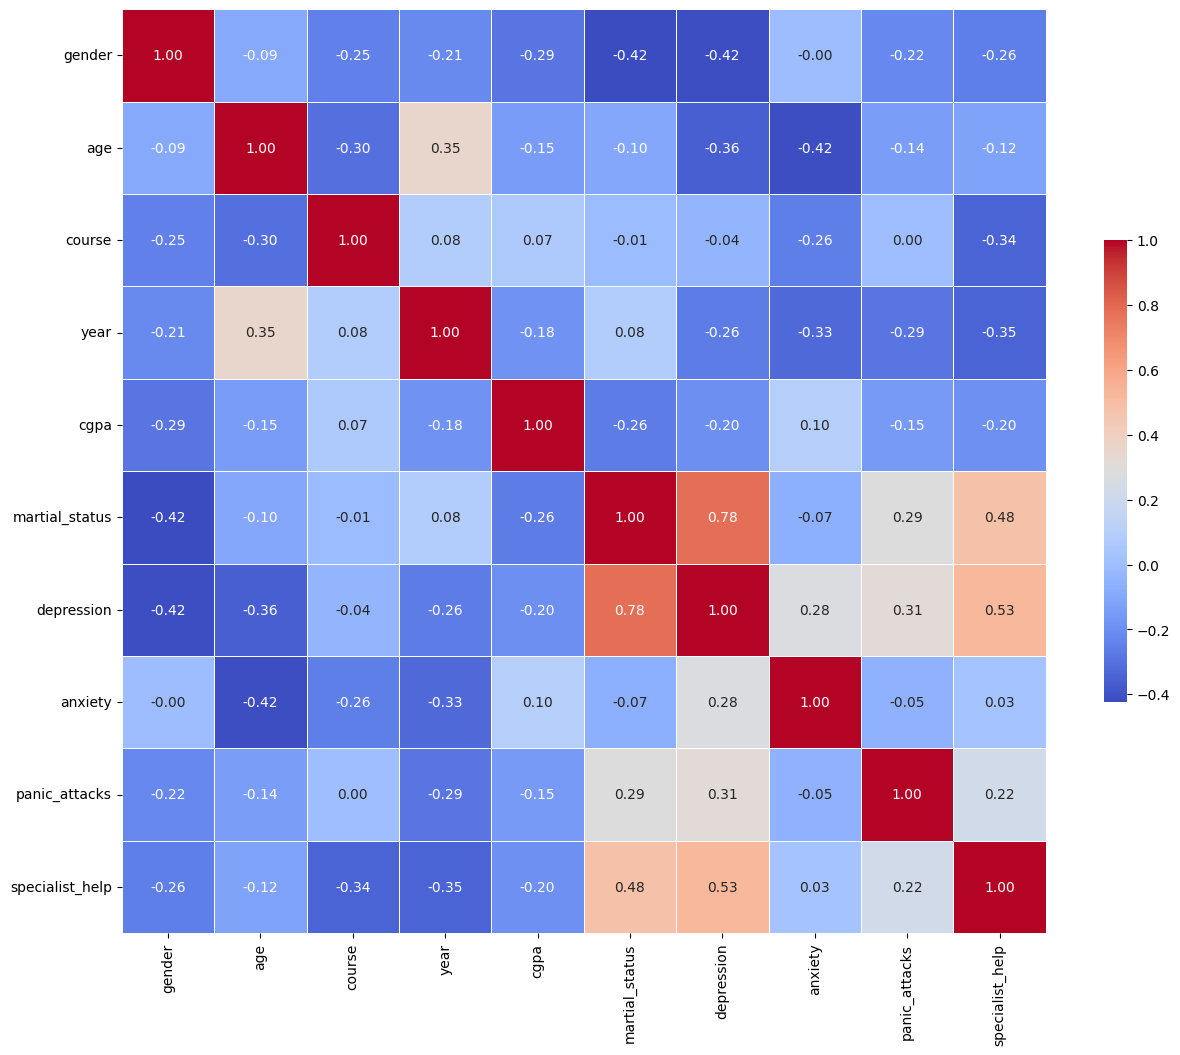

In [ ]:
plt.figure(figsize=(15, 12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

2. Выберите целевую переменную и решите задачу регрессии, рассмотрев минимум 5 моделей и определив минимум 3 метрики работы моделей. Выберите лучшую модель. Для лучшей модели определите значимость признаков. Отбросив половину худших признаков, определите метрики работы модели без этих признаков. Подберите оптимальные параметры лучшей модели и определите метрики работы модели при этих значениях. Оцените качество работы лучшей моделей на основе кросс-валидации. Постройте кривые обучения (потерь) и оцените недообучение и переобучение.

In [ ]:
data_clean = data.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


data_x = data.drop('depression', axis=1)
data_y = data['depression']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.7)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Определение моделей
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "KNeighbors Regression": KNeighborsRegressor(n_neighbors=5)
}

# Списки для хранения метрик каждой модели
mae_scores = []
mse_scores = []
r2_scores = []
model_names = []


# Обучение и оценка моделей
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Добавление метрик в соответствующие списки
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    model_names.append(name)

    print(f"Model: {name}")
    print(f"  MAE: {mae:.3f}")
    print(f"  MSE: {mse:.3f}")
    print(f"  R^2: {r2:.3f}")


Model: Linear Regression
  MAE: 0.314
  MSE: 0.132
  R^2: 0.260
Model: Lasso Regression
  MAE: 0.360
  MSE: 0.153
  R^2: 0.143
Model: Ridge Regression
  MAE: 0.314
  MSE: 0.132
  R^2: 0.261
Model: ElasticNet Regression
  MAE: 0.340
  MSE: 0.143
  R^2: 0.203
Model: KNeighbors Regression
  MAE: 0.307
  MSE: 0.152
  R^2: 0.150


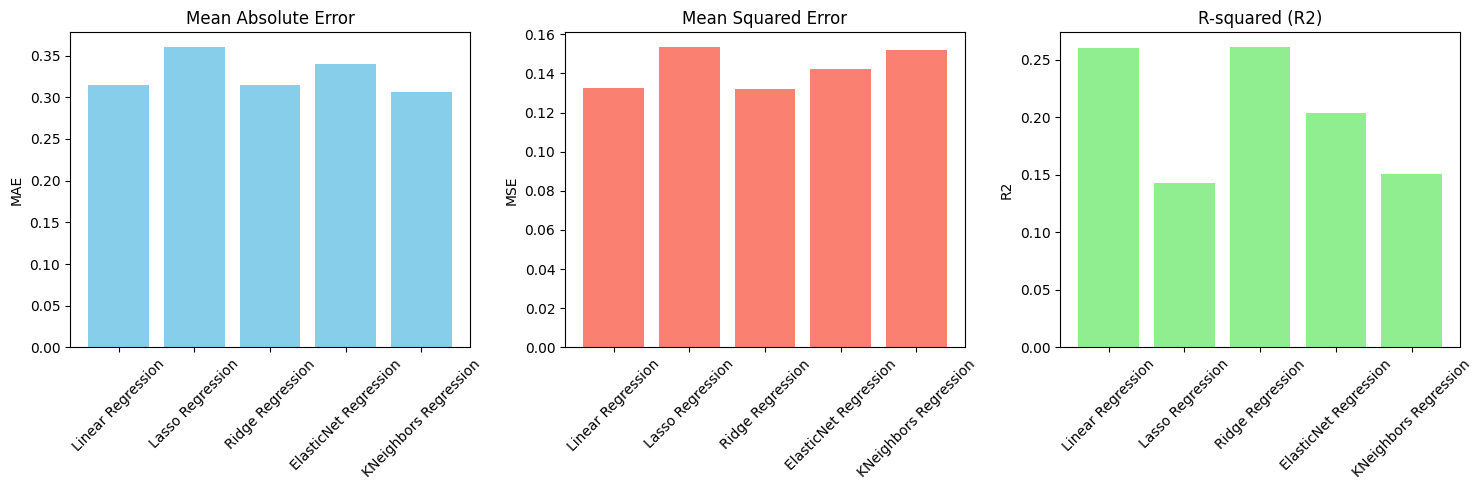

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

x = np.arange(len(models))

axes[0].bar(model_names, mae_scores, color='skyblue')
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylabel('MAE')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45)

axes[1].bar(model_names, mse_scores, color='salmon')
axes[1].set_title('Mean Squared Error')
axes[1].set_ylabel('MSE')
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names, rotation=45)

axes[2].bar(model_names, r2_scores, color='lightgreen')
axes[2].set_title('R-squared (R2)')
axes[2].set_ylabel('R2')
axes[2].set_xticks(x)
axes[2].set_xticklabels(model_names, rotation=45)

plt.tight_layout()
plt.show()

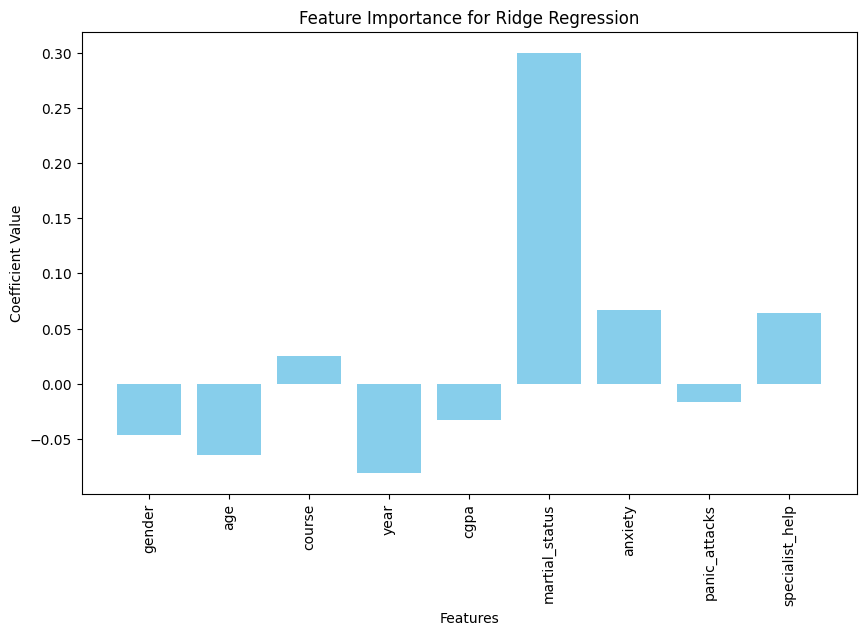

In [ ]:
ridge_model = models['Ridge Regression']

coefficients = ridge_model.coef_

# Построение графика значимости признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients, color='skyblue')
plt.xticks(range(len(coefficients)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance for Ridge Regression')
plt.show()

In [ ]:
data.drop("panic_attacks", axis=1, inplace=True)
data.drop("course", axis=1, inplace=True)
data.drop("year", axis=1, inplace=True)
data.drop("age", axis=1, inplace=True)

data

,gender,cgpa,martial_status,depression,anxiety,specialist_help
0,0,3,0,1,0,0
1,1,3,0,0,1,0
2,1,3,0,1,1,0
3,0,3,1,1,0,0
4,1,3,0,0,0,0
...,...,...,...,...,...,...
96,0,4,0,0,1,0
97,1,3,0,1,1,0
98,0,4,1,1,0,0
99,0,4,0,0,0,0


In [ ]:
from sklearn.model_selection import GridSearchCV

data_x = data.drop('depression', axis=1)
data_y = data['depression']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.7)


ridge_model = Ridge()

# Определение диапазона значений параметров для подбора
param_grid = {
    'alpha': [0.1, 1, 10],  # Параметр регуляризации
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Метод решения
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2')

# Поиск лучших параметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)  # Негативное среднеквадратичное отклонение (меньше - лучше)


Best parameters: {'alpha': 1, 'solver': 'saga'}
Best score: -0.17408244315350116


Model: Ridge
  MAE: 0.291
  MSE: 0.124
  R^2: 0.482


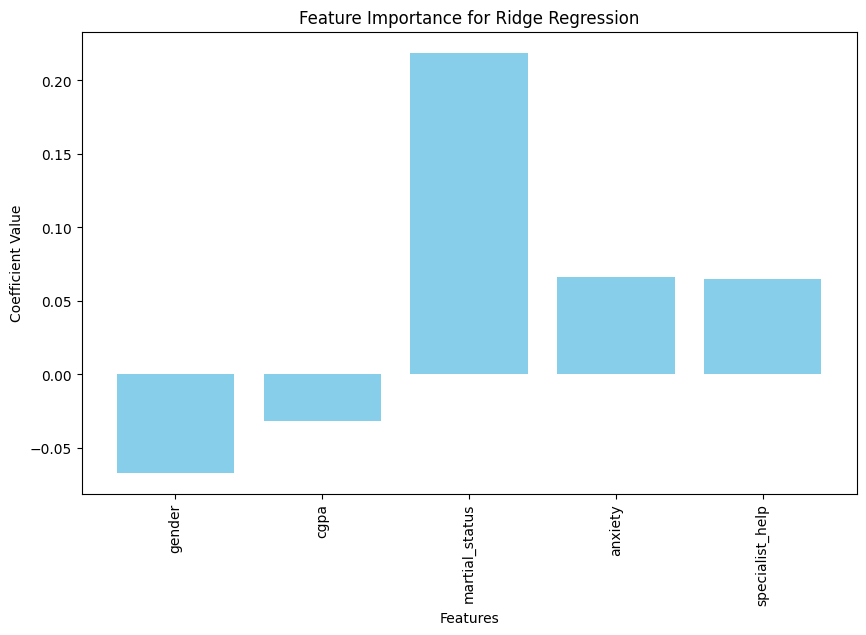

In [ ]:
data_x = data.drop('depression', axis=1)
data_y = data['depression']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.7)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1, solver='saga')

ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model: Ridge")
print(f"  MAE: {mae:.3f}")
print(f"  MSE: {mse:.3f}")
print(f"  R^2: {r2:.3f}")

coefficients = ridge_model.coef_

# Построение графика значимости признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients, color='skyblue')
plt.xticks(range(len(coefficients)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance for Ridge Regression')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ridge_model, data_x, data_y, cv=5, scoring='r2')

# Вывод результатов
print("R^2 scores:", scores)
print("Mean R^2 score:", np.mean(scores))

R^2 scores: [0.39105763 0.45296193 0.20908889 0.28282361 0.36431258]
Mean R^2 score: 0.340048929214335


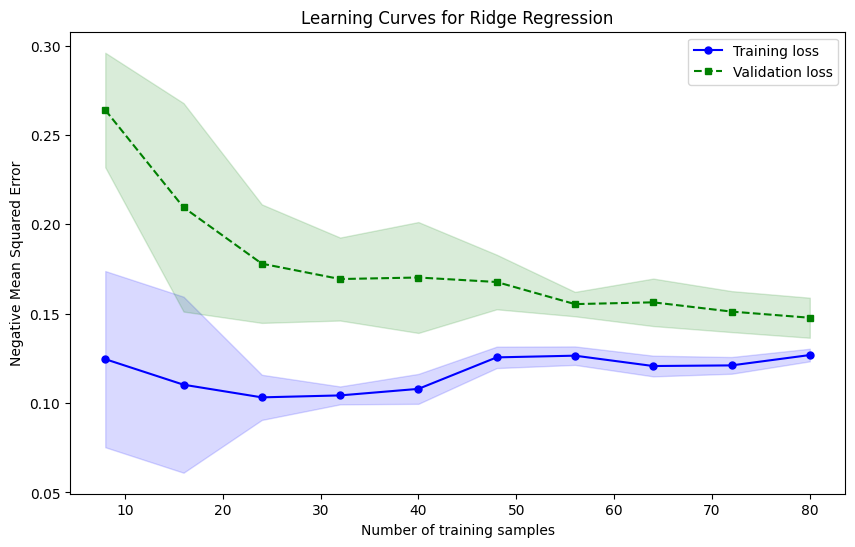

In [ ]:
from sklearn.model_selection import learning_curve

# Получение кривых обучения
train_sizes, train_scores, test_scores = learning_curve(ridge_model, data_x, data_y, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error')

# Расчет средних значений и стандартных отклонений для оценок
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Построение кривых обучения
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curves for Ridge Regression')
plt.legend()
plt.show()


3. Выберите целевую переменную и решите задачу классификации, рассмотрев минимум 5 моделей и определив 4 метрики работы моделей. Выберите лучшую модель. Подберите оптимальные параметры лучшей модели и определите метрики работы модели при этих значениях.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


data_class = data_clean.copy()

data_x = data_class.drop('anxiety', axis=1)
data_y = data_class['anxiety']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Обучение и оценка моделей
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}")
    print(f"  AUC-ROC: {auc_roc}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
  Accuracy: 0.6333333333333333
  Precision: 0.3333333333333333
  Recall: 0.2222222222222222
  F1-score: 0.26666666666666666
  AUC-ROC: 0.5158730158730159


Model: Support Vector Machine
  Accuracy: 0.7
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0
  AUC-ROC: 0.5


Model: Random Forest
  Accuracy: 0.6666666666666666
  Precision: 0.4
  Recall: 0.2222222222222222
  F1-score: 0.2857142857142857
  AUC-ROC: 0.5396825396825398


Model: Gradient Boosting
  Accuracy: 0.7333333333333333
  Precision: 0.5555555555555556
  Recall: 0.5555555555555556
  F1-score: 0.5555555555555556
  AUC-ROC: 0.6825396825396826


Model: K-Nearest Neighbors
  Accuracy: 0.6
  Precision: 0.2
  Recall: 0.1111111111111111
  F1-score: 0.14285714285714285
  AUC-ROC: 0.46031746031746035




In [ ]:
random_forest = RandomForestClassifier()


random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Model: Random Forest")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1-score: {f1}")
print(f"  AUC-ROC: {auc_roc}")
print('\n')


Model: Random Forest
  Accuracy: 0.6666666666666666
  Precision: 0.4
  Recall: 0.2222222222222222
  F1-score: 0.2857142857142857
  AUC-ROC: 0.5396825396825398




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Определим диапазон значений параметров для подбора
param_grid = {
    'n_estimators': [100, 200, 300],  # Количество деревьев в лесу
    'max_depth': [None, 10, 20],  # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],  # Минимальное количество примеров, необходимых для разделения узла
    'min_samples_leaf': [1, 2, 4],  # Минимальное количество примеров в листовом узле
}

# Создание модели RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Инициализация GridSearchCV с кросс-валидацией на 5 фолдов
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Поиск лучших параметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.6


In [ ]:
random_forest = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100)


random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Model: Random Forest")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1-score: {f1}")
print(f"  AUC-ROC: {auc_roc}")
print('\n')

Model: Random Forest
  Accuracy: 0.6
  Precision: 0.2857142857142857
  Recall: 0.2222222222222222
  F1-score: 0.25
  AUC-ROC: 0.4920634920634921




4. Решите задачу уменьшения размерности (неконтролируемое обучение). Используя модели из п.2 или п.3, оцените как уменьшение размерности повлияло на метрики работы модели.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Определение модели RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100)

# Определение метода уменьшения размерности (PCA)
pca = PCA(n_components=2)  # Задайте количество компонентов, которые вы хотите оставить

# Создание конвейера (pipeline) с последовательным применением PCA и RandomForestClassifier
pipeline = Pipeline([
    ('pca', pca),
    ('rf', rf_model)
])

# Обучение модели на конвейере
pipeline.fit(X_train, y_train)

# Оценка качества модели
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7333333333333333


5. Решите задачу кластеризации, используя минимум 3 модели. Определите метрики кластеризации.

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift

# Модель KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_clean)
kmeans_labels = kmeans.labels_

# Модель Mean Shift
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(data_clean)

# Модель Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(data_clean)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Вычисление метрик для модели KMeans
silhouette_kmeans = silhouette_score(data_clean, kmeans_labels)
db_index_kmeans = davies_bouldin_score(data_clean, kmeans_labels)

# Вычисление метрик для модели Mean Shift
silhouette_meanshift = silhouette_score(data_clean, meanshift_labels)
db_index_meanshift = davies_bouldin_score(data_clean, meanshift_labels)

# Вычисление метрик для модели Agglomerative Clustering
silhouette_agg = silhouette_score(data_clean, agglomerative_labels)
db_index_agg = davies_bouldin_score(data_clean, agglomerative_labels)

# Вывод метрик
print("Metrics for KMeans:")
print("Silhouette Score:", silhouette_kmeans)
print("Davies-Bouldin Index:", db_index_kmeans)
print()

print("Metrics for Mean Shift:")
print("Silhouette Score:", silhouette_meanshift)
print("Davies-Bouldin Index:", db_index_meanshift)
print()

print("Metrics for Agglomerative Clustering:")
print("Silhouette Score:", silhouette_agg)
print("Davies-Bouldin Index:", db_index_agg)


Metrics for KMeans:
Silhouette Score: 0.5631140184889634
Davies-Bouldin Index: 0.5648430518185253

Metrics for Mean Shift:
Silhouette Score: 0.47151578011833273
Davies-Bouldin Index: 0.6183934449608389

Metrics for Agglomerative Clustering:
Silhouette Score: 0.5590933122568045
Davies-Bouldin Index: 0.5721897643329902


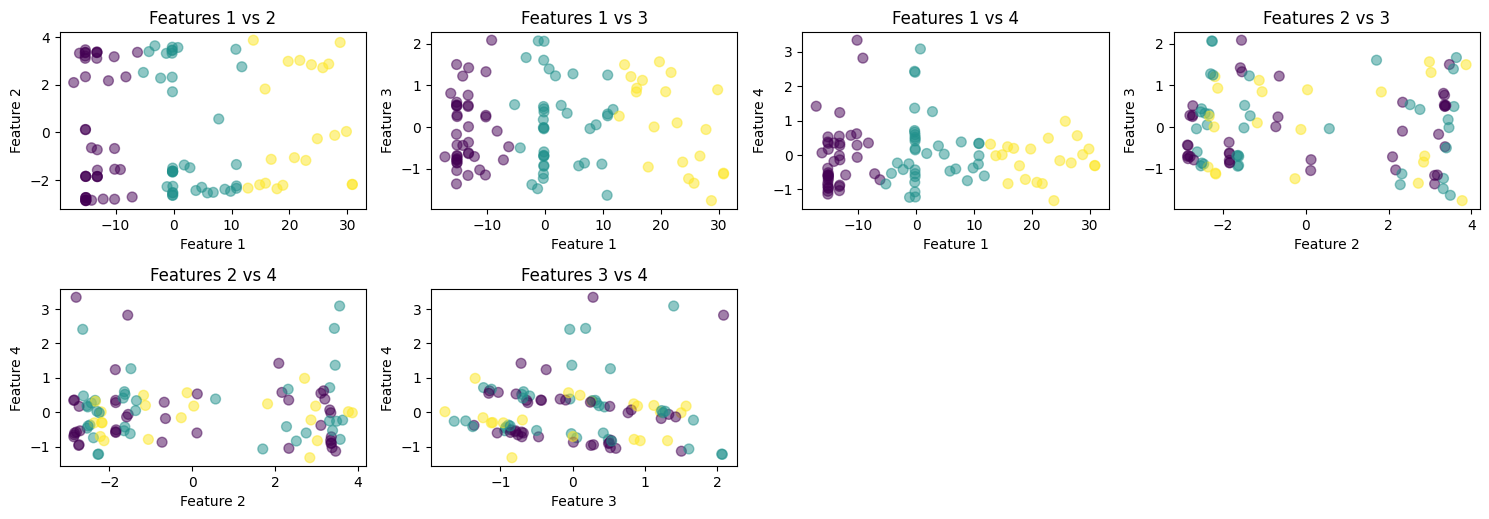

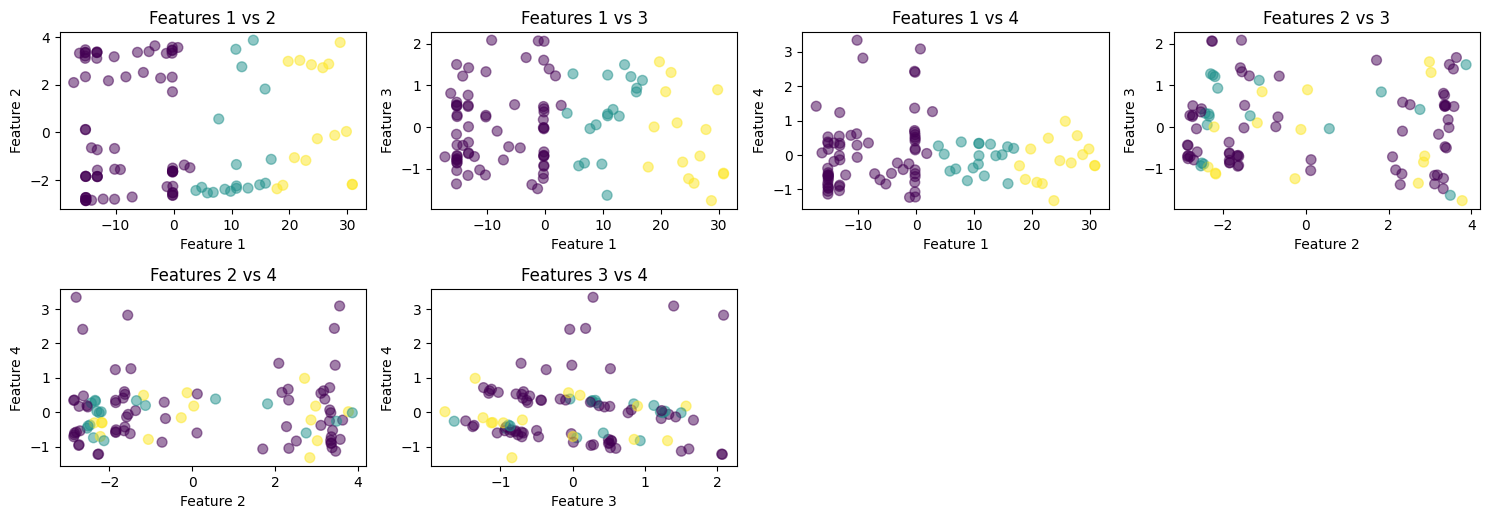

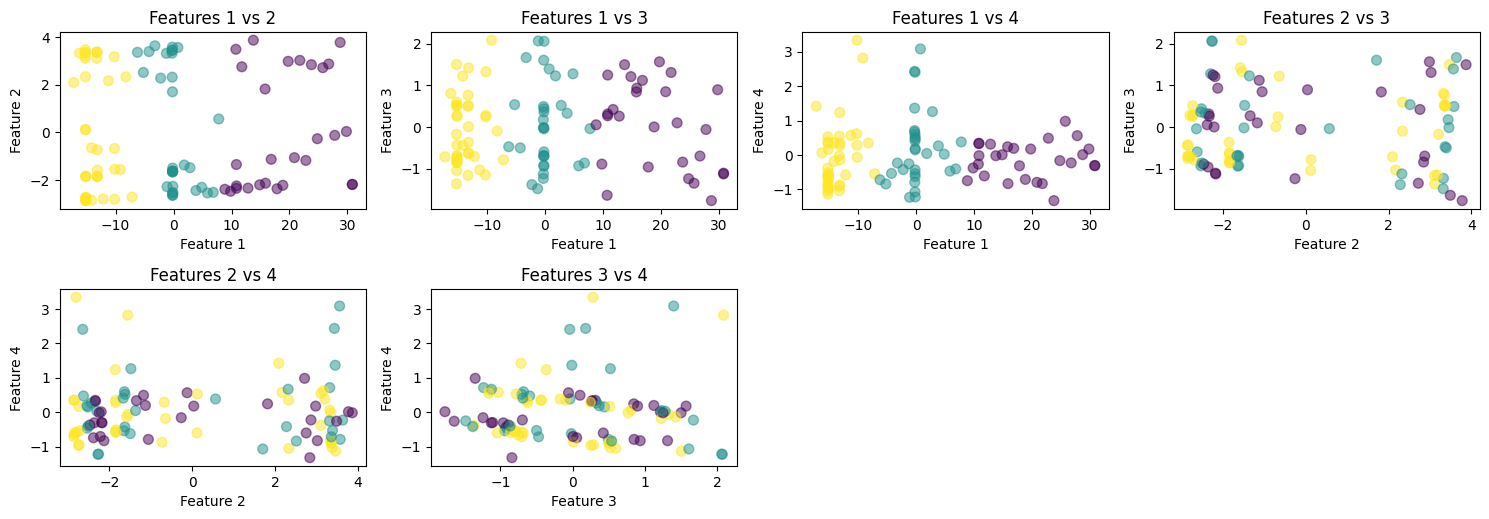

In [ ]:
import itertools

pca = PCA(n_components=4)
X_pca = pca.fit_transform(data_clean)

# Создание комбинаций признаков для построения графиков
feature_combinations = list(itertools.combinations(range(X_pca.shape[1]), 2))


# Графики для модели KMeans
plt.figure(figsize=(15, 10))
for i, (feature1, feature2) in enumerate(feature_combinations, 1):
    plt.subplot(4, 4, i)
    plt.scatter(X_pca[:, feature1], X_pca[:, feature2], c=kmeans_labels, cmap='viridis', marker='o', s=50, alpha=0.5)
    plt.title(f'Features {feature1+1} vs {feature2+1}')
    plt.xlabel(f'Feature {feature1+1}')
    plt.ylabel(f'Feature {feature2+1}')
plt.tight_layout()
plt.show()

# Графики для модели DBSCAN
plt.figure(figsize=(15, 10))
for i, (feature1, feature2) in enumerate(feature_combinations, 1):
    plt.subplot(4, 4, i)
    plt.scatter(X_pca[:, feature1], X_pca[:, feature2], c=meanshift_labels, cmap='viridis', marker='o', s=50, alpha=0.5)
    plt.title(f'Features {feature1+1} vs {feature2+1}')
    plt.xlabel(f'Feature {feature1+1}')
    plt.ylabel(f'Feature {feature2+1}')
plt.tight_layout()
plt.show()

# Графики для модели Agglomerative Clustering
plt.figure(figsize=(15, 10))
for i, (feature1, feature2) in enumerate(feature_combinations, 1):
    plt.subplot(4, 4, i)
    plt.scatter(X_pca[:, feature1], X_pca[:, feature2], c=agglomerative_labels, cmap='viridis', marker='o', s=50, alpha=0.5)
    plt.title(f'Features {feature1+1} vs {feature2+1}')
    plt.xlabel(f'Feature {feature1+1}')
    plt.ylabel(f'Feature {feature2+1}')
plt.tight_layout()
plt.show()


6. Опишите внедрение (потенциальное внедрение) полученных моделей и результатов в ваш проект, а также возможность создания нового умного функционала продукта/сервиса.

Полученные результаты анализа влияния учебных оценок на ментальное состояние студента можно использовать для улучшения процесса автоматического оценивания лабораторных работ студентов.

- Идентификация студентов, требующих дополнительной поддержки: можно использовать результаты анализа для выявления студентов, у которых наблюдаются низкие учебные оценки и/или отрицательное ментальное состояние. Такие студенты могут требовать дополнительной поддержки или помощи в процессе обучения, поэтому можно использовать эту информацию для автоматического выделения таких студентов и предоставления им дополнительных ресурсов или рекомендаций.

- Персонализированное обучение: можно создать модели, которые предсказывают, какие типы заданий или подходы к обучению наиболее эффективны для различных групп студентов. Это позволит адаптировать процесс автоматического оценивания таким образом, чтобы он учитывал индивидуальные потребности студентов и мог предложить им персонализированные рекомендации.

- Автоматическая обратная связь и рекомендации: можно использовать модели, чтобы предоставлять автоматическую обратную связь и рекомендации студентам по их академическим успехам и ментальному благополучию. Например, вы можете предложить студентам дополнительные материалы для самостоятельного изучения в случае неудовлетворительных результатов оценивания или предложить им ресурсы для поддержки и самоуправления.

- Оптимизация процесса оценивания: используя модели можно оптимизировать процесс автоматического оценивания лабораторных работ студентов. Можно использовать выявленные закономерности и шаблоны в данных для разработки более точных и эффективных методов оценивания, что в конечном итоге повысит качество оценки и улучшит общий образовательный опыт студентов.

Таким образом, мы можем значительно повысить эффективность и результативность образовательного процесса.






